# Data Pre-processing

In [110]:
# Reading Head Database
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Processing

In [108]:
# Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Settings 
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [109]:
# Importing CSV

df= pd.read_csv('train_v9rqX0R.csv')

In [111]:
# Information about the database

print('Total Rows:', df.shape[0])
print('Total Columns:', df.shape[1])

Total Rows: 8523
Total Columns: 12


In [112]:
df.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)

In [113]:
# Descriptive Statistics
df.select_dtypes(exclude='object').describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.64,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,8.77,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


### Exploratory Graphs // Cleaning

#### Fat in products

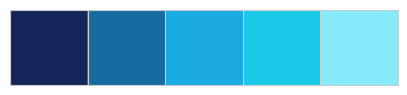

In [114]:
# Plot Collors
cyan_grad = ['#142459', '#176BA0', '#19AADE', '#1AC9E6', '#87EAFA']

sns.palplot(cyan_grad)

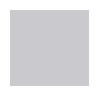

In [129]:
light_gray = ['#CAC9CD']
sns.palplot(light_gray)

In [115]:
# Setting configuration of data viz
colors = cyan_grad

In [116]:
# Fat Content Analysis // Item_Fat_Content // type(obj)

df.Item_Fat_Content.value_counts(dropna=False)

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

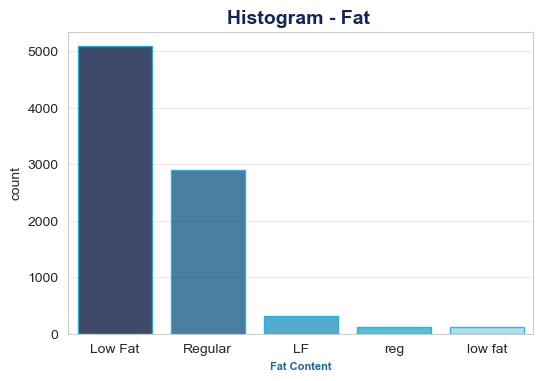

In [117]:
# Fat distribuition - Histogram

colors=cyan_grad
labels=df['Item_Fat_Content'].dropna().unique()
order=df['Item_Fat_Content'].value_counts().index

plt.title('Histogram - Fat ', fontweight='bold', fontsize=14, color=cyan_grad[0])
ax = sns.countplot(x='Item_Fat_Content', data=df, palette=colors, order=order, edgecolor=cyan_grad[2], alpha=0.85)
plt.xlabel('Fat Content', fontweight='bold', fontsize=8, color=cyan_grad[1])
plt.grid(axis='y', alpha=0.4)

## inconsistent values, mvalues have same meaning but in different form. (Low Fat // low fat // LF)


In [118]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

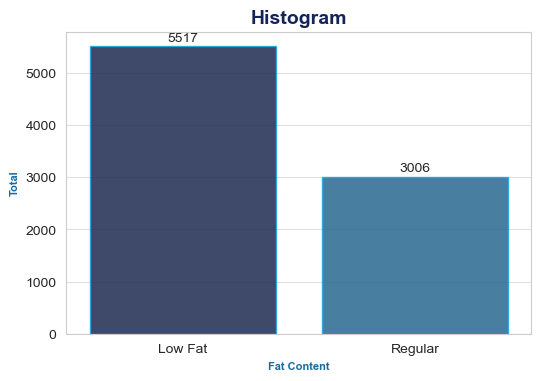

In [119]:
# Fat distribuition - Histogram -> Clean

colors=cyan_grad

labels=df['Item_Fat_Content'].dropna().unique()
order=df['Item_Fat_Content'].value_counts().index

plt.title('Histogram', fontweight='bold', fontsize=14, color=cyan_grad[0])

ax = sns.countplot(x='Item_Fat_Content', data=df, palette=colors, order=order, edgecolor=cyan_grad[2], alpha=0.85)

for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+100,rect.get_height(), horizontalalignment='center',
    fontsize=10, bbox=dict(facecolor='none', edgecolor=cyan_grad[0], linewidth=0))

plt.xlabel('Fat Content', fontweight='bold', fontsize=8, color=cyan_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=8, color=cyan_grad[1])
plt.grid(axis='y', alpha=0.6)

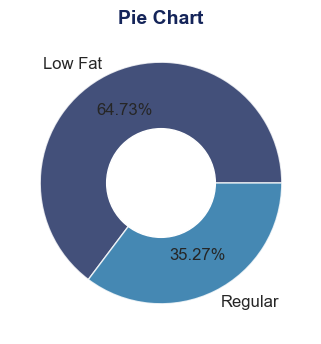

In [121]:
# Fat distribuition - Pie % -> Clean
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=cyan_grad[0])
plt.pie(df['Item_Fat_Content'].value_counts(), colors=colors, labels=order, pctdistance=0.67, autopct='%.2f%%',
        wedgeprops=dict(alpha=0.8), textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#### Types of product

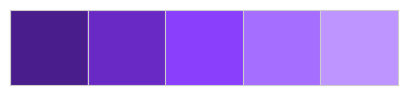

In [122]:
# Plot Collors
purple_grad = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF', '#BE95FF']
sns.palplot(purple_grad)

In [123]:
items =df['Item_Type'].value_counts()
items

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

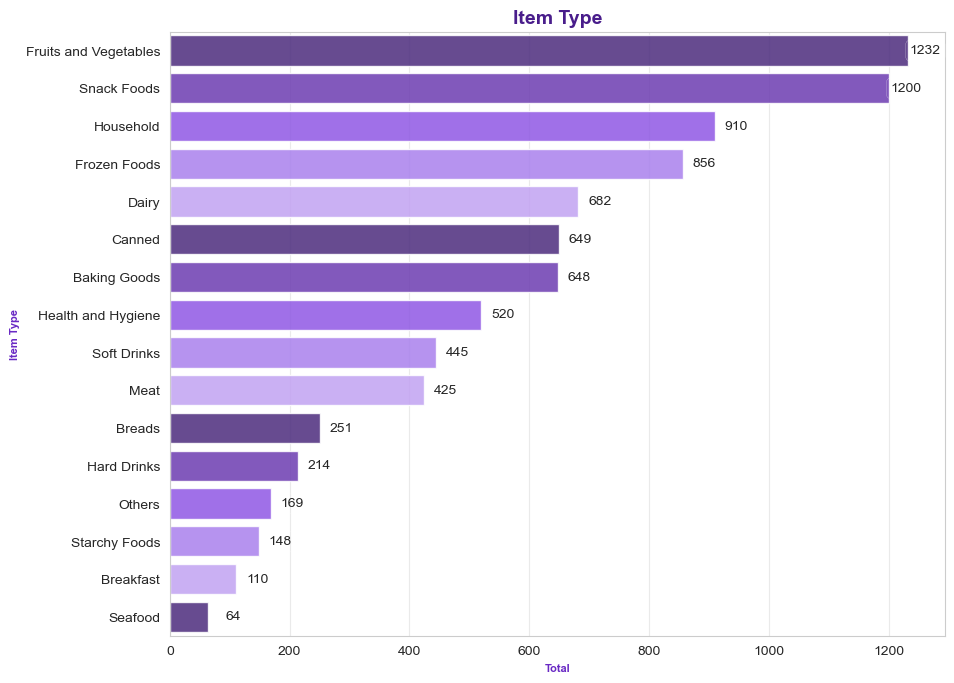

In [124]:
# Histogram Distribuition - Items Type
labels=df['Item_Type'].unique()
order=df['Item_Type'].value_counts().index
plt.figure(figsize=(10,8))

ax = sns.countplot(y='Item_Type', data=df, palette=purple_grad, order=order, alpha=0.85)
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width+55, y+height/2, '{:.0f}'.format(width), horizontalalignment='right', verticalalignment='center',
             bbox=dict(facecolor='none', linewidth=0.15, boxstyle='round'))

plt.title('Item Type', fontweight='bold', fontsize=14, color=purple_grad[0])
plt.xlabel('Total', fontweight='bold', fontsize=8, color=purple_grad[1])
plt.ylabel('Item Type', fontweight='bold', fontsize=8, color=purple_grad[1])
plt.grid(axis='x', alpha=0.4);



#### Outlet

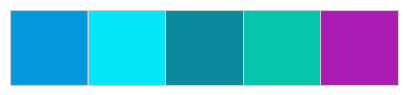

In [125]:
color_mix = ['#0698DC', '#05E6FA', '#09899B', '#04C4AC', '#AB1CB4']
sns.palplot(color_mix)

In [126]:
outlet=df['Outlet_Size'].value_counts()
outlet

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [127]:
labels=df['Outlet_Size'].dropna().unique()
order=df['Outlet_Size'].value_counts().index

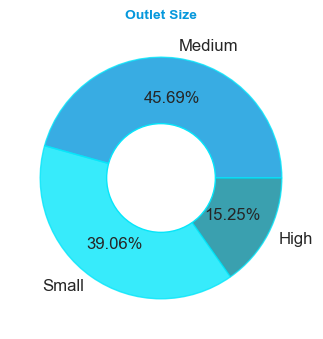

In [135]:
plt.title('Outlet Size', fontweight='bold', fontsize=10, fontfamily='sans-serif', color=color_mix[0])
plt.pie(df['Outlet_Size'].value_counts(), colors=color_mix, labels=order, pctdistance=0.67, autopct='%.2f%%', 
        wedgeprops=dict(alpha=0.8, edgecolor=color_mix[1]), textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=color_mix[1])
plt.gcf().gca().add_artist(centre)

In [136]:
colors=color_mix[2:5]

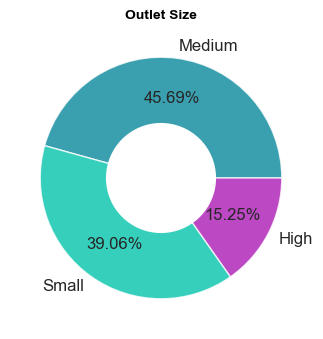

In [142]:
plt.title('Outlet Size', fontweight='bold', fontsize=10, fontfamily='sans-serif', color='k')
plt.pie(df['Outlet_Size'].value_counts(), colors=colors, labels=order, pctdistance=0.67, autopct='%.2f%%', 
        wedgeprops=dict(alpha=0.8), textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

In [151]:
df.Outlet_Type.value_counts(dropna=False)

# There are 4 outlet types namely grocery store - 3 of them are supermarkets

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

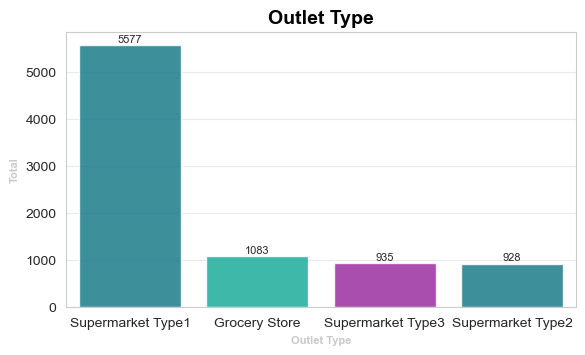

In [149]:
#  Histogram Distribuition
labels=df['Outlet_Type'].dropna().unique()
order=df['Outlet_Type'].value_counts().index

plt.title('Outlet Type', fontweight='bold', fontsize=14, color='k')
ax = sns.countplot(x='Outlet_Type', data=df, palette=colors, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+60,rect.get_height(), horizontalalignment='center', 
             fontsize=8, bbox=dict(facecolor='none', linewidth=0))
plt.tight_layout(rect=[0, 0.04, 1, 0.96])
plt.xlabel('Outlet Type', fontweight='bold', fontsize=8,color=light_gray[0])
plt.ylabel('Total', fontweight='bold', fontsize=8,color=light_gray[0])
plt.grid(axis='y', alpha=0.4)



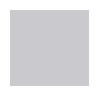

In [ ]:
light_gray = ['#CAC9CD']
sns.palplot(light_gray)

#### Missing values

In [168]:
df.isnull().sum()
#The total of missing values in each column is less than 25%, which means that imputation can still be done to fill in the missing values.

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [173]:
df.groupby(['Outlet_Type', 'Outlet_Size'], dropna=False)['Item_Identifier'].nunique().reset_index().sort_values(by=['Outlet_Size'], ascending=False).style.background_gradient(cmap='GnBu')

,Outlet_Type,Outlet_Size,Item_Identifier
0,Grocery Store,Small,528
4,Supermarket Type1,Small,1311
3,Supermarket Type1,Medium,930
6,Supermarket Type2,Medium,928
7,Supermarket Type3,Medium,935
2,Supermarket Type1,High,932
1,Grocery Store,nan,555
5,Supermarket Type1,nan,1305


In [175]:
df['Outlet_Size'] = df['Outlet_Size'].replace(np.nan, 'Small')

In [176]:
df.groupby(['Outlet_Type', 'Outlet_Size'], dropna=False)['Item_Identifier'].nunique().reset_index().sort_values(by=['Outlet_Size'], ascending=False).style.background_gradient(cmap='Blues')

,Outlet_Type,Outlet_Size,Item_Identifier
0,Grocery Store,Small,901
3,Supermarket Type1,Small,1512
2,Supermarket Type1,Medium,930
4,Supermarket Type2,Medium,928
5,Supermarket Type3,Medium,935
1,Supermarket Type1,High,932


In [180]:
# Group 'Item_Identifier' and 'Item_Weight' 
# These missing values will be imputed using last value replacement method.
df[['Item_Identifier', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier']).head(13).style.background_gradient(cmap='PuBu')

,Item_Identifier,Item_Weight
118,DRA12,11.600000
2879,DRA24,nan
1148,DRA24,19.350000
6057,DRA59,nan
1876,DRA59,8.270000
3733,DRB01,nan
3465,DRB01,7.390000
1431,DRB13,6.115000
2657,DRB24,8.785000
776,DRB25,12.300000


In [182]:
df['Item_Weight']=df.groupby('Item_Identifier')['Item_Weight'].fillna(method='ffill')
df['Item_Weight']=df.groupby('Item_Identifier')['Item_Weight'].fillna(method='bfill')

In [183]:
df[['Item_Identifier', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier']).head(13).style.background_gradient(cmap='GnBu')

,Item_Identifier,Item_Weight
118,DRA12,11.600000
1148,DRA24,19.350000
1876,DRA59,8.270000
3465,DRB01,7.390000
1431,DRB13,6.115000
2657,DRB24,8.785000
776,DRB25,12.300000
103,DRB48,16.750000
1,DRC01,5.920000
772,DRC12,17.850000


In [186]:
df1 = df[['Item_Identifier', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])
nan_values = df1[df1['Item_Weight'].isna()]
print (nan_values)

# Are still missing values in "Item_Weight" column. -> These missing values will be imputed with column mean value.

     Item_Identifier  Item_Weight
4187           FDE52          NaN
1922           FDK57          NaN
927            FDN52          NaN
5022           FDQ60          NaN


In [189]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [190]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Statistics

In [156]:
df.select_dtypes(exclude='object').describe().T.style.background_gradient(cmap='GnBu')

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.000000,12.857645,4.643456,4.555000,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.000000,0.066132,0.051598,0.000000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.000000,140.992782,62.275067,31.290000,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.000000,1997.831867,8.371760,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.000000,2181.288914,1706.499616,33.290000,834.247400,1794.331000,3101.296400,13086.964800


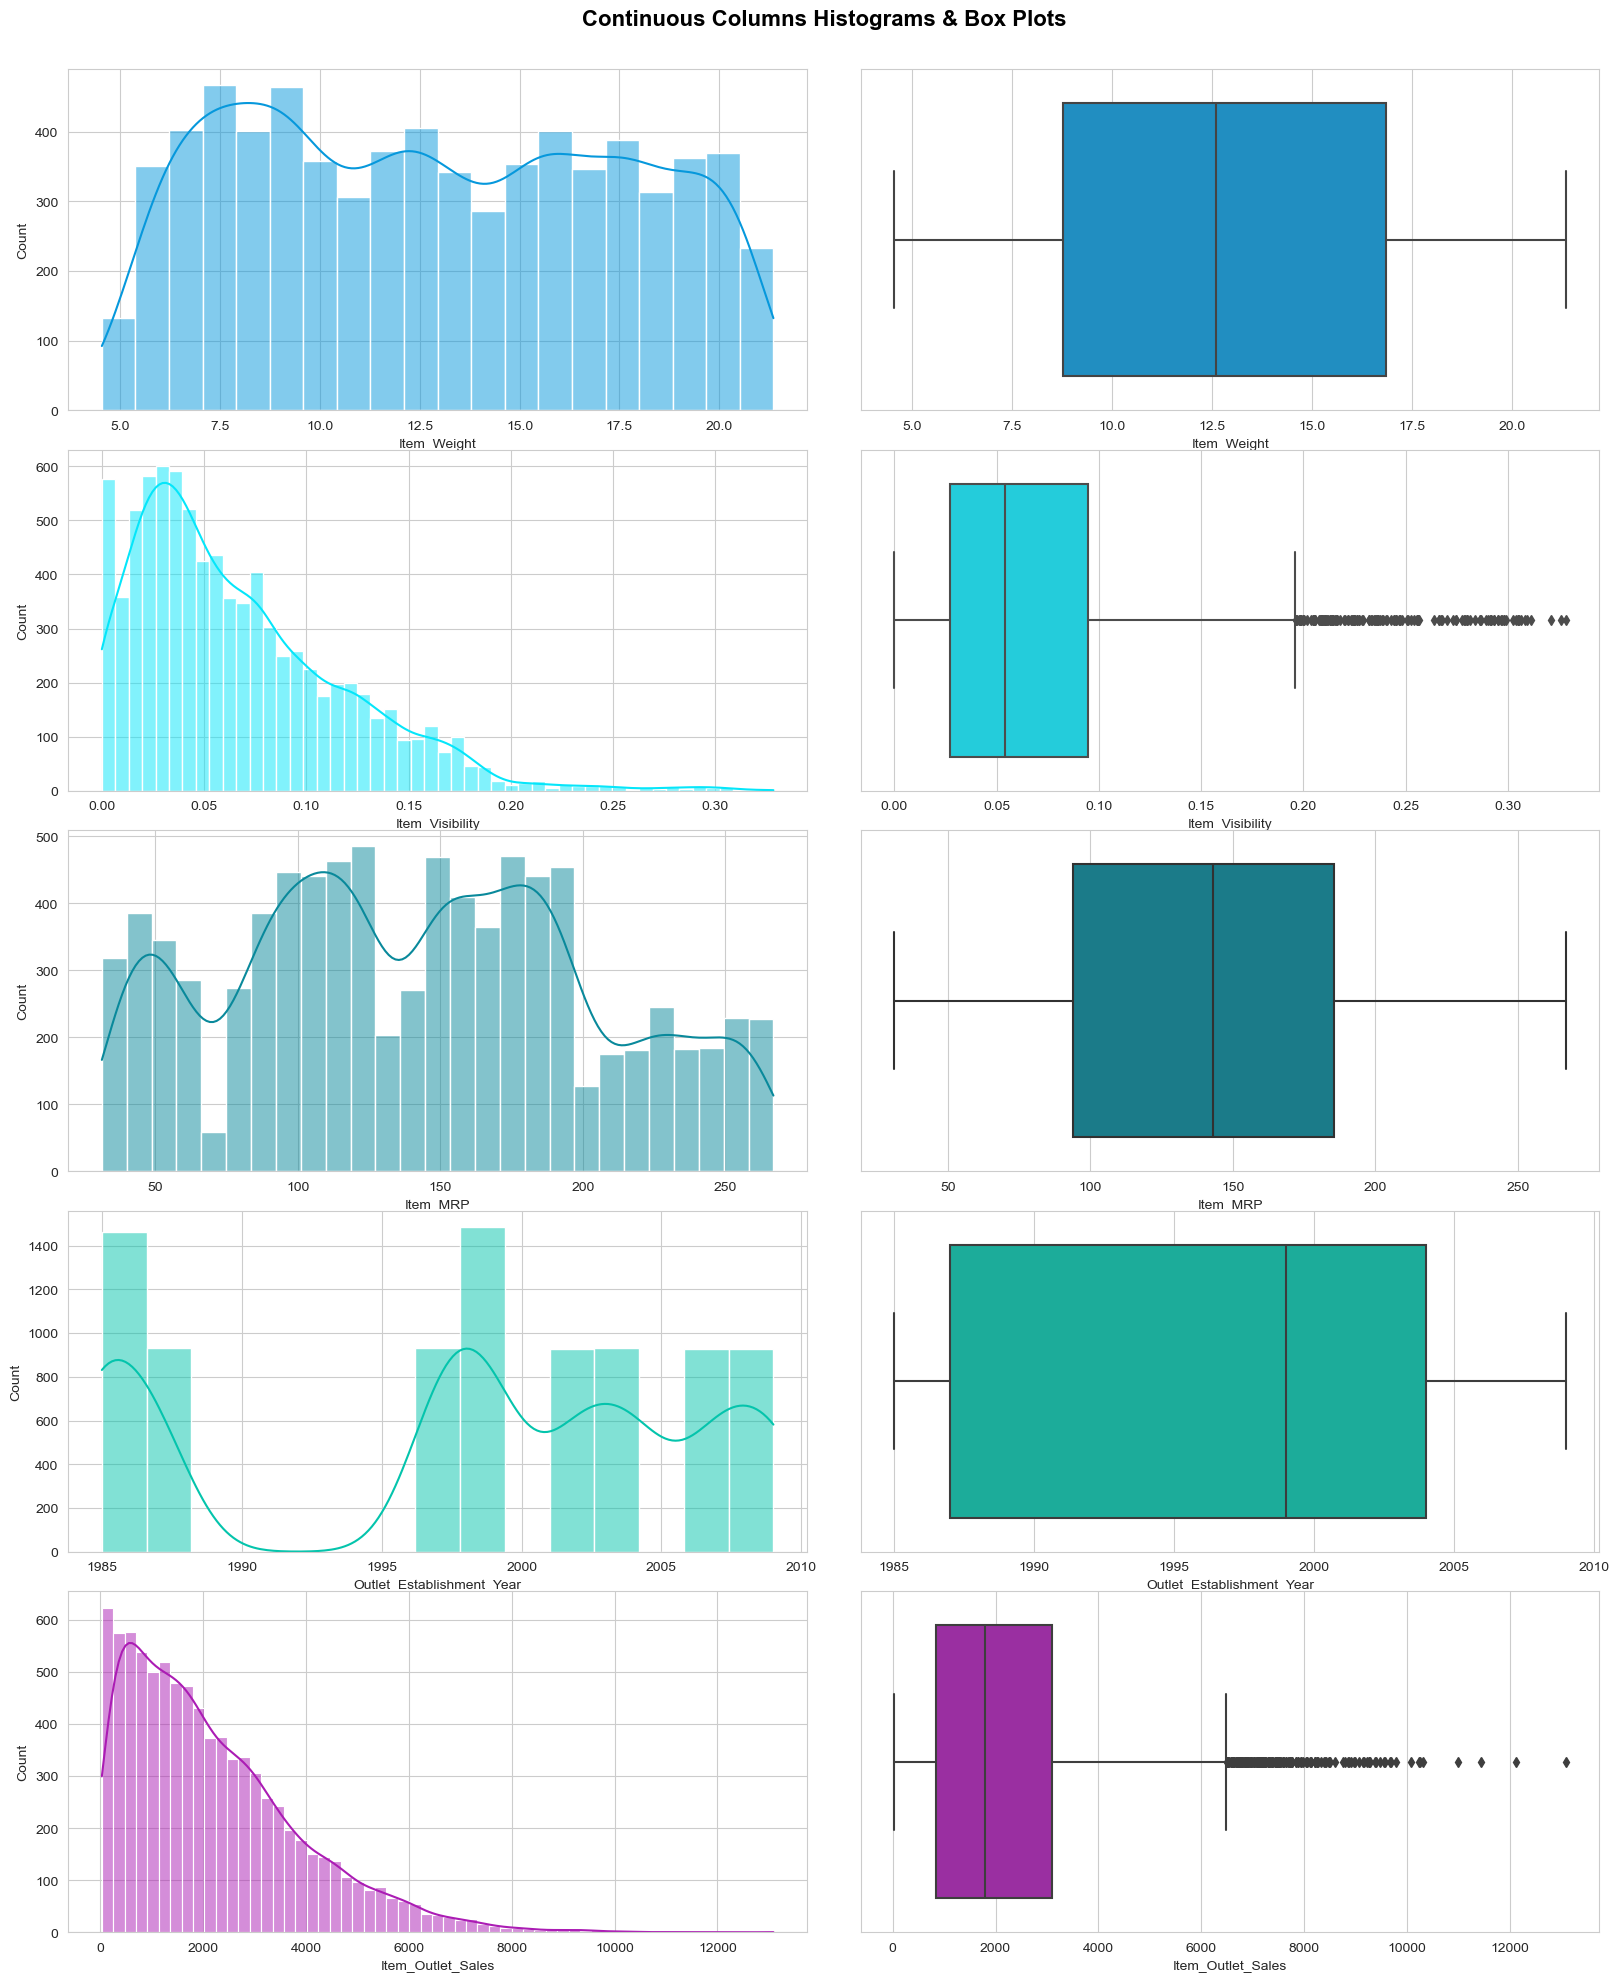

In [158]:

fig, axs = plt.subplots(5, 2, figsize=(16, 20))
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle('Continuous Columns Histograms & Box Plots', fontweight='bold', fontsize='16', fontfamily='sans-serif', 
             color='k')

# (Row 1)
sns.histplot(data=df, x='Item_Weight', kde=True, ax=axs[0, 0], color=color_mix[0])
sns.boxplot(data=df, x='Item_Weight', ax=axs[0, 1], color=color_mix[0]);

#(Row 2)
sns.histplot(data=df, x='Item_Visibility', kde=True, ax=axs[1, 0], color=color_mix[1])
sns.boxplot(data=df, x='Item_Visibility', ax=axs[1, 1], color=color_mix[1])

# (Row 3)
sns.histplot(data=df, x='Item_MRP', kde=True, ax=axs[2, 0], color=color_mix[2])
sns.boxplot(data=df, x='Item_MRP', ax=axs[2, 1], color=color_mix[2])

# (Row 4)
sns.histplot(data=df, x='Outlet_Establishment_Year', kde=True, ax=axs[3, 0], color=color_mix[3])
sns.boxplot(data=df, x='Outlet_Establishment_Year', ax=axs[3, 1], color=color_mix[3])

#(Row 5)
sns.histplot(data=df, x='Item_Outlet_Sales', kde=True, ax=axs[4, 0], color=color_mix[4])
sns.boxplot(data=df, x='Item_Outlet_Sales', ax=axs[4, 1], color=color_mix[4]);

In [159]:
# Item_Weight, Item_MRP, and Outlet_Establishment_Year distribution is normal (no outliers detected in these columns).
# For Item_Visibility and Item_Outlet_Sales distribution, the distribution is right-skewed distributions (has a long right tail, the mean position is on the right side of the data). These outliers will be pre-processed in the next section.

#### Skewness

In [166]:
df.select_dtypes(exclude='object').skew(axis = 0)

#If skewness is less than -1 or greater than 1, the distribution is highly skewed. 
#If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. 
#If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

#Item_Visibility and Item_Outlet_Sales are highly skewed
#Item_Weight, Item_MRP, and Outlet_Establishment_Year are normally skewed

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

#### Kurtosis

In [165]:
df.select_dtypes(exclude='object').kurt(axis = 0)

# Kurtosis values used to show tailedness of a column. 
# The value of normal distribution (mesokurtotic) should be equal to 3. 
# If kurtosis value is more than 3, it is called leptokurtic. 
# if kurtosis value is less than 3, then it is called platikurtic.

#All continuous variables are platikurtic 

Item_Weight                 -1.227766
Item_Visibility              1.679445
Item_MRP                    -0.889769
Outlet_Establishment_Year   -1.205694
Item_Outlet_Sales            1.615877
dtype: float64

#### Outliars

In [191]:
# "Item_Visibility" and "Item_Outlet_Sales" have outliers.

#  Copy of Both Columns
df1 = df[['Item_Visibility', 'Item_Outlet_Sales']].copy()

# Log Transformation
df1['Item_Visibility_log'] = np.log(df1['Item_Visibility'])
df1['Item_Outlet_Sales_log'] = np.log(df1['Item_Outlet_Sales'])

#Square Root Transformation
df1['Item_Visibility_sqrt'] = np.sqrt(df1['Item_Visibility'])
df1['Item_Outlet_Sales_sqrt'] = np.sqrt(df1['Item_Outlet_Sales'])

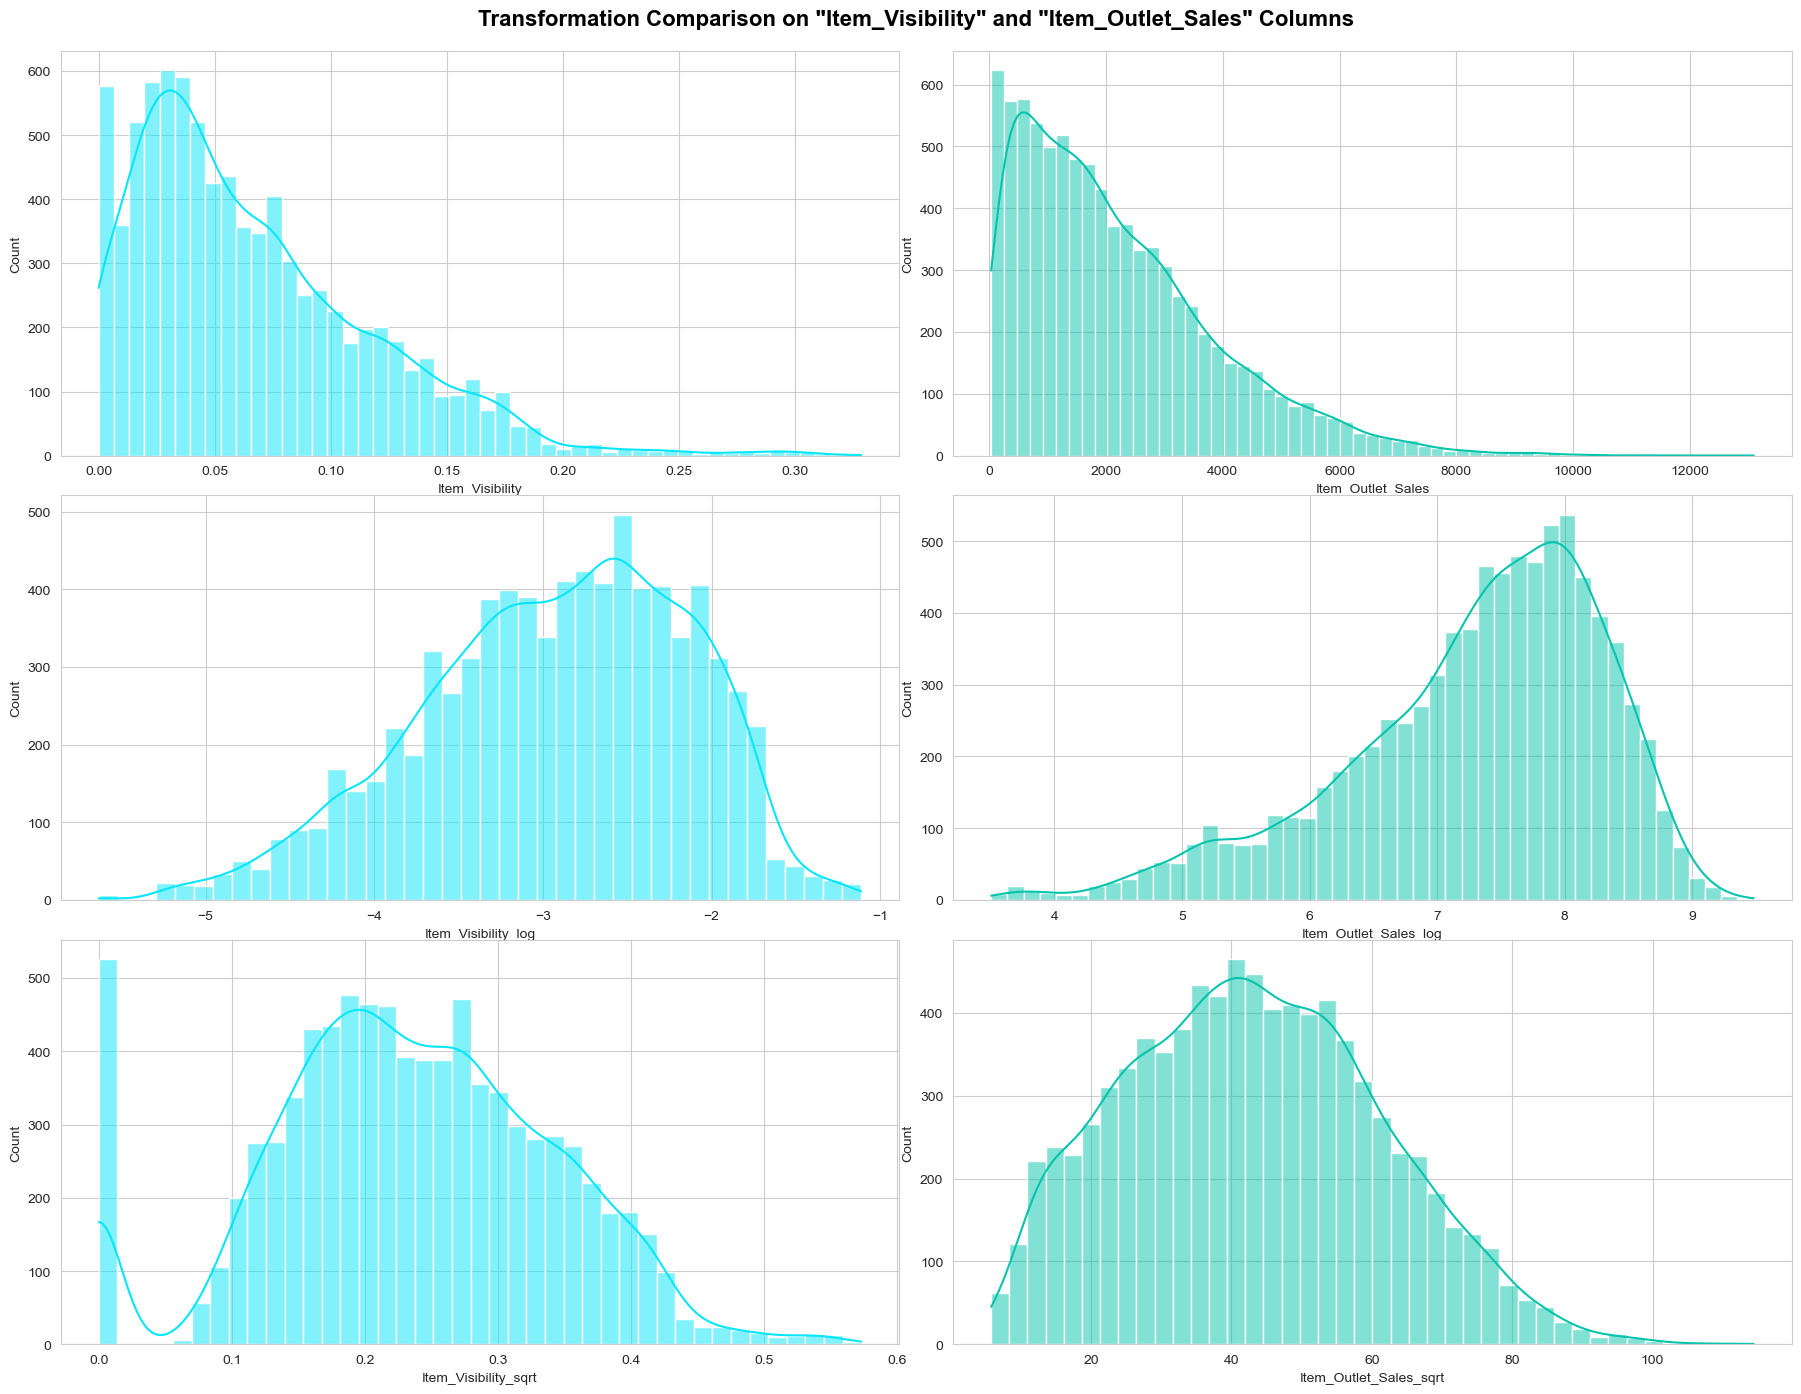

In [194]:
fig, axs = plt.subplots(3, 2, figsize=(18, 14))
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle('Transformation Comparison on "Item_Visibility" and "Item_Outlet_Sales" Columns', 
             fontweight='bold', fontsize='16', fontfamily='sans-serif', color='k')

# "Item_Visibility" Transformation (Column 1)
sns.histplot(data=df1, x='Item_Visibility', kde=True, ax=axs[0, 0], color=color_mix[1])
sns.histplot(data=df1, x='Item_Visibility_log', kde=True, ax=axs[1, 0], color=color_mix[1])
sns.histplot(data=df1, x='Item_Visibility_sqrt', kde=True, ax=axs[2, 0], color=color_mix[1])

#"Item_Outlet_Sales" Transformation (Column 2)
sns.histplot(data=df1, x='Item_Outlet_Sales', kde=True, ax=axs[0, 1], color=color_mix[3])
sns.histplot(data=df1, x='Item_Outlet_Sales_log', kde=True, ax=axs[1, 1], color=color_mix[3])
sns.histplot(data=df1, x='Item_Outlet_Sales_sqrt', kde=True, ax=axs[2, 1], color=color_mix[3]);

In [195]:
# It can be concluded that square root transformation is better compared to log transformation. 
# The histogram distributions of square root transformation are closer to nomral distribution.